# Artificial Neural Network & Deep Learning

## Artificial Neural Network (ANN)

### A simple model (Mô hình nơ-ron nhân tạo)

![](https://miro.medium.com/max/684/0*RuUpWDXIqL_tWpvH.png)

![](https://github.com/tdoan89/ml-dataset/raw/main/imgs/simple_ann.png)

### Sophisticate Model - Deep Learning (Học sâu)

![](https://github.com/tdoan89/ml-dataset/raw/main/imgs/sophisticate_ann.png)

### Backpropagation (Lan truyền ngược)

![](https://github.com/tdoan89/ml-dataset/raw/main/imgs/backpropagation.png)

In [1]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install sklearn
!pip install tensorflow

In [ ]:
# i = []
# while(True):
#   i.append('a')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [5]:
data = load_breast_cancer(as_frame=True)
cancer = data['frame']
cancer.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

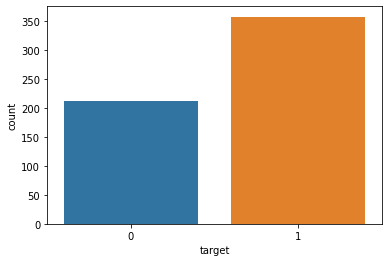

In [7]:
sns.countplot(data=cancer, x='target')
plt.show()

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import InputLayer, Dense, Dropout, BatchNormalization

In [10]:
cancer.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [11]:
# split train and test data with ratio of 75:25
X, y = cancer.drop(columns=['target']), cancer['target']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
x_train.shape[1]

30

In [38]:
# clf = LinearRegression() SVM()
# Neural Network: 1 input layer -> k * hidden layer -> 1 output layer
model = Sequential([ # Tao ra Model
                    # init input layer
                    InputLayer(x_train.shape[1]),
                    # define hidden layer
                    Dense(25, activation='tanh'), # relu, ...
                    Dropout(0.3), # 0.2-0.5
                    BatchNormalization(),
                    Dense(15, activation='tanh'), # additional hidden layers
                    Dropout(0.3), # 0.2-0.5
                    BatchNormalization(),
                    Dense(10, activation='tanh'), # additional hidden layers
                    Dropout(0.3), # 0.2-0.5
                    BatchNormalization(),
                    # define output layer
                    Dense(1, activation='sigmoid')
])

In [39]:
model.compile( # Inital Model()
    loss = 'binary_crossentropy', # binary classification - binary crossentropy, multi-class classification - categorical crossentropy
    optimizer = 'adam', #adamW, sgd, ...
    metrics = ['accuracy']
)

- **Epoch**: Number of time a whole dataset going throught 1 iteration.
- **Batch size**
- **Learning rate**

In [40]:
model.fit(x_train, y_train, epochs=150, batch_size=100) # Earlystopping

Epoch 1/150
5/5 [==============================] - 1s 4ms/step - loss: 0.9836 - accuracy: 0.5282
Epoch 2/150
5/5 [==============================] - 0s 4ms/step - loss: 0.9818 - accuracy: 0.5305
Epoch 3/150
5/5 [==============================] - 0s 3ms/step - loss: 0.8941 - accuracy: 0.5681
Epoch 4/150
5/5 [==============================] - 0s 3ms/step - loss: 0.8781 - accuracy: 0.5892
Epoch 5/150
5/5 [==============================] - 0s 3ms/step - loss: 0.8183 - accuracy: 0.5728
Epoch 6/150
5/5 [==============================] - 0s 4ms/step - loss: 0.8312 - accuracy: 0.5892
Epoch 7/150
5/5 [==============================] - 0s 3ms/step - loss: 0.8080 - accuracy: 0.5822
Epoch 8/150
5/5 [==============================] - 0s 3ms/step - loss: 0.7031 - accuracy: 0.6526
Epoch 9/150
5/5 [==============================] - 0s 3ms/step - loss: 0.6787 - accuracy: 0.6549
Epoch 10/150
5/5 [==============================] - 0s 3ms/step - loss: 0.6597 - accuracy: 0.6667
Epoch 11/150
5/5 [===========

In [22]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.2068 - accuracy: 0.9301


[0.2067539393901825, 0.9300699234008789]

In [26]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=150, batch_size=100)

Epoch 1/150
4/4 [==============================] - 0s 56ms/step - loss: 0.2109 - accuracy: 0.9235 - val_loss: 0.2869 - val_accuracy: 0.9186
Epoch 2/150
4/4 [==============================] - 0s 13ms/step - loss: 0.2083 - accuracy: 0.9294 - val_loss: 0.2749 - val_accuracy: 0.9186
Epoch 3/150
4/4 [==============================] - 0s 15ms/step - loss: 0.2067 - accuracy: 0.9353 - val_loss: 0.2800 - val_accuracy: 0.8953
Epoch 4/150
4/4 [==============================] - 0s 14ms/step - loss: 0.2071 - accuracy: 0.9294 - val_loss: 0.2741 - val_accuracy: 0.9070
Epoch 5/150
4/4 [==============================] - 0s 14ms/step - loss: 0.2071 - accuracy: 0.9382 - val_loss: 0.2728 - val_accuracy: 0.9070
Epoch 6/150
4/4 [==============================] - 0s 15ms/step - loss: 0.2048 - accuracy: 0.9353 - val_loss: 0.2756 - val_accuracy: 0.9070
Epoch 7/150
4/4 [==============================] - 0s 15ms/step - loss: 0.2074 - accuracy: 0.9382 - val_loss: 0.2724 - val_accuracy: 0.9186
Epoch 8/150
4/4 [===

In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

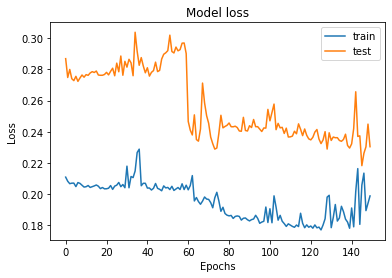

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','test'], loc='best')
plt.show()

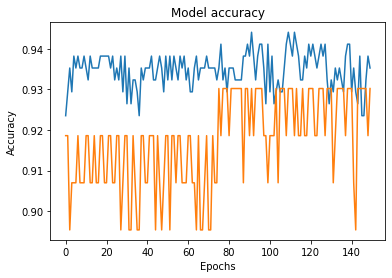

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [42]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience=10, restore_best_weights=True)
model.fit(x_train, y_train, validation_split=0.2, epochs=150, batch_size=100, callbacks=es)

Epoch 1/150
4/4 [==============================] - 0s 70ms/step - loss: 0.3482 - accuracy: 0.8735 - val_loss: 0.3308 - val_accuracy: 0.8953
Epoch 2/150
4/4 [==============================] - 0s 21ms/step - loss: 0.3058 - accuracy: 0.8853 - val_loss: 0.3295 - val_accuracy: 0.8953
Epoch 3/150
4/4 [==============================] - 0s 18ms/step - loss: 0.2931 - accuracy: 0.9059 - val_loss: 0.3521 - val_accuracy: 0.8837
Epoch 4/150
4/4 [==============================] - 0s 18ms/step - loss: 0.2956 - accuracy: 0.8912 - val_loss: 0.3589 - val_accuracy: 0.8837
Epoch 5/150
4/4 [==============================] - 0s 18ms/step - loss: 0.3147 - accuracy: 0.8971 - val_loss: 0.3499 - val_accuracy: 0.8837
Epoch 6/150
4/4 [==============================] - 0s 21ms/step - loss: 0.2920 - accuracy: 0.8971 - val_loss: 0.3502 - val_accuracy: 0.8837
Epoch 7/150
4/4 [==============================] - 0s 22ms/step - loss: 0.3000 - accuracy: 0.9059 - val_loss: 0.3694 - val_accuracy: 0.8837
Epoch 8/150
4/4 [===